<a href="https://colab.research.google.com/github/kvamsi7/ZeroToNLP/blob/main/Text%20Classification%20of%20Quora%20questions%20" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text classification with Bag of Words

In [21]:
import os 
from pathlib import Path

In [22]:
data_dir = Path('./quora-insincere-questions-classification')

In [23]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'

In [26]:
# os.listdir(data_dir)

## Dowload and Explore Dataset

In [11]:
!kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data
!kaggle competitions download -c quora-insincere-questions-classification -f test.csv -p data
!kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv -p data

 98% 54.0M/54.9M [00:00<00:00, 99.1MB/s]
100% 54.9M/54.9M [00:00<00:00, 102MB/s] 
 32% 5.00M/15.8M [00:00<00:00, 44.5MB/s]
100% 15.8M/15.8M [00:00<00:00, 104MB/s] 
  0% 0.00/4.09M [00:00<?, ?B/s]
100% 4.09M/4.09M [00:00<00:00, 153MB/s]


## Explore the data 

In [29]:
train_fname = 'data/train.csv.zip'
test_fname = 'data/test.csv.zip'
sample_fname = 'data/sample_submission.csv.zip'

In [13]:
import pandas as pd

In [14]:
raw_df = pd.read_csv(train_fname)

In [19]:
# Sincere Questions
sincere_df = raw_df[raw_df.target == 0]
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [18]:
# insincere Questions
insincere_df = raw_df[raw_df.target == 1]
insincere_df.question_text.values[:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

In [30]:
test_df = pd.read_csv(test_fname)
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [153]:
submission_df = pd.read_csv(sample_fname)
submission_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


### Distribution of sincere and insincere questions

In [42]:
raw_df.target.value_counts(normalize = True)

0    0.93813
1    0.06187
Name: target, dtype: float64

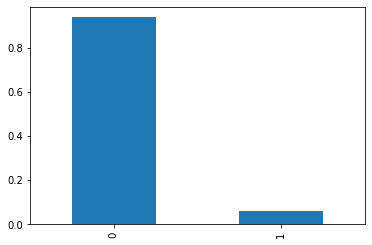

In [41]:
raw_df.target.value_counts(normalize = True).plot(kind = 'bar')

data is pretty imbalance, hence we will no goind to use the precision and recall as the evaluation metric but will use the F1 score

### Create Working Sample

In [102]:
SAMPLE_SIZE = 100_000

In [103]:
sample_df = raw_df.sample(SAMPLE_SIZE,random_state = 42)

In [104]:
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


## Text Preprocessing Techniques

1. Bag of words technique

  problems with BOW:
  1. There many two many distinct words (which increase the dimention of vector)
  2. Some words may appear too frequently or too rarely
  3. The word may have many different forms (e.g: go,gone,going,bird vs birds)

### Tokenization 
==> splitting a sentence or a document into a list of words|

In [105]:
import nltk

In [106]:
from nltk.tokenize import word_tokenize

In [48]:
nltk.download('punkt') # download punctuations

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Stop Word Removal

In [51]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [52]:
english_stopwords = stopwords.words('english')

In [54]:
', '.join(english_stopwords)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [56]:
def remove_stopwords(tokens):
  return [word.lower() for word in tokens if word.lower() not in english_stopwords]

### Stemming

In [107]:
from nltk.stem.snowball import SnowballStemmer

In [108]:
stemmer = SnowballStemmer(language = 'english')

In [60]:
stemmer.stem('going')

'go'

### Lemmatization

In [62]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

## Bag of Words Implementation

outline:
- create a vocabulory with count Vectorizer
- Tranform questions into vectors
- Configure some parameters for countVectorizer

In [109]:
from sklearn.feature_extraction.text import CountVectorizer

In [110]:
small_df = sample_df.head(10)

In [111]:
small_df.question_text.values

array(['What is the most effective classroom management skill/technique to create a good learning environment?',
       'Can I study abroad after 10th class from Bangladesh?',
       'How can I make friends as a college junior?',
       'How do I download free APK Minecraft: Pocket Edition for iOS (iPhone)?',
       'Like Kuvera, is "Groww" also a free online investment platform where I can invest in direct mutual funds?',
       'What is the precise definition for record in academic reading terms?',
       "What was Leonidas's role in the battle of Thermopylae?",
       'How can we get universities in Germany with out TOEFL and IELTS?',
       "What's the remainder of 30^33/3?",
       'What is your mindset while learning a new skill or anything?'],
      dtype=object)

In [113]:
small_vect = CountVectorizer()

In [114]:
small_vect.fit(small_df.question_text)

CountVectorizer()

In [115]:
len(small_vect.vocabulary_)

81

In [116]:
small_vect.get_feature_names_out()

array(['10th', '30', '33', 'abroad', 'academic', 'after', 'also', 'and',
       'anything', 'apk', 'as', 'bangladesh', 'battle', 'can', 'class',
       'classroom', 'college', 'create', 'definition', 'direct', 'do',
       'download', 'edition', 'effective', 'environment', 'for', 'free',
       'friends', 'from', 'funds', 'germany', 'get', 'good', 'groww',
       'how', 'ielts', 'in', 'invest', 'investment', 'ios', 'iphone',
       'is', 'junior', 'kuvera', 'learning', 'leonidas', 'like', 'make',
       'management', 'mindset', 'minecraft', 'most', 'mutual', 'new',
       'of', 'online', 'or', 'out', 'platform', 'pocket', 'precise',
       'reading', 'record', 'remainder', 'role', 'skill', 'study',
       'technique', 'terms', 'the', 'thermopylae', 'to', 'toefl',
       'universities', 'was', 'we', 'what', 'where', 'while', 'with',
       'your'], dtype=object)

### Transform text into vectors

In [117]:
small_df.question_text.values

array(['What is the most effective classroom management skill/technique to create a good learning environment?',
       'Can I study abroad after 10th class from Bangladesh?',
       'How can I make friends as a college junior?',
       'How do I download free APK Minecraft: Pocket Edition for iOS (iPhone)?',
       'Like Kuvera, is "Groww" also a free online investment platform where I can invest in direct mutual funds?',
       'What is the precise definition for record in academic reading terms?',
       "What was Leonidas's role in the battle of Thermopylae?",
       'How can we get universities in Germany with out TOEFL and IELTS?',
       "What's the remainder of 30^33/3?",
       'What is your mindset while learning a new skill or anything?'],
      dtype=object)

In [118]:
small_inputs = small_vect.transform(small_df.question_text)

In [119]:
small_inputs.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0

### Confiqure CountVectorizer

In [78]:
def tokenize(text):
  return [stemmer.stem(word) for word in word_tokenize(text)]

In [120]:
vectorizer = CountVectorizer(lowercase = True,
                             tokenizer= tokenize,
                             stop_words = english_stopwords,
                             max_features = 1000)

In [121]:
%%time
vectorizer.fit(sample_df.question_text)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  % sorted(inconsistent)


CPU times: user 22.9 s, sys: 93.1 ms, total: 23 s
Wall time: 23.1 s


CountVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7fd32959cef0>)

In [122]:
len(vectorizer.vocabulary_)

1000

In [123]:
vectorizer.get_feature_names_out()[:100]

array(['!', '$', '%', '&', "'", "''", "'m", "'s", '(', ')', ',', '-', '.',
       '1', '10', '100', '12', '12th', '15', '2', '20', '2017', '2018',
       '3', '4', '5', '6', '7', '8', ':', '?', '[', ']', '``', 'abl',
       'abroad', 'abus', 'accept', 'access', 'accomplish', 'accord',
       'account', 'achiev', 'act', 'action', 'activ', 'actor', 'actual',
       'ad', 'add', 'address', 'admiss', 'adult', 'advanc', 'advantag',
       'advic', 'affect', 'africa', 'african', 'age', 'agre', 'air',
       'allow', 'almost', 'alon', 'alreadi', 'also', 'altern', 'alway',
       'amazon', 'america', 'american', 'amount', 'analysi', 'android',
       'ani', 'anim', 'anoth', 'answer', 'anxieti', 'anyon', 'anyth',
       'apart', 'app', 'appear', 'appl', 'appli', 'applic', 'approach',
       'arab', 'area', 'armi', 'around', 'art', 'asian', 'ask', 'associ',
       'atheist', 'attack', 'attend'], dtype=object)

In [124]:
%%time
inputs = vectorizer.transform(sample_df.question_text)

CPU times: user 22.5 s, sys: 54.5 ms, total: 22.6 s
Wall time: 22.6 s


In [125]:
inputs.shape

(100000, 1000)

In [126]:
sample_df.question_text.values[0]

'What is the most effective classroom management skill/technique to create a good learning environment?'

In [127]:
inputs[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

## ML Models for Text Classification

Outline:
- Split training and validation set

In [128]:
inputs.shape

(100000, 1000)

In [129]:
targets = sample_df.target
targets.shape

(100000,)

## Split Training and Validation 

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
train_inputs,val_inputs,train_targets,val_targets = train_test_split(inputs,targets,train_size = 0.7,random_state= 42)

In [133]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [134]:
test_inputs = vectorizer.transform(test_df.question_text)

In [135]:
test_inputs.shape

(375806, 1000)

### Train a Logistic Regression Model

In [136]:
from sklearn.linear_model import LogisticRegression

In [138]:
logreg_model = LogisticRegression(solver = 'sag',
                                  max_iter = 1000)

In [139]:
logreg_model.fit(train_inputs,train_targets)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(max_iter=1000, solver='sag')

In [141]:
train_preds = logreg_model.predict(train_inputs)
pd.Series(train_preds).value_counts()

0    67957
1     2043
dtype: int64

In [144]:
from sklearn.metrics import accuracy_score,f1_score

In [143]:
accuracy_score(train_targets,train_preds)

0.9504428571428571

In [145]:
f1_score(train_targets,train_preds)

0.4457581083240134

In [146]:
val_preds = logreg_model.predict(val_inputs)

In [147]:
f1_score(val_targets,val_preds)

0.40843507214206437

In [149]:
test_preds = logreg_model.predict(test_inputs)

In [154]:
submission_df.prediction = test_preds

In [155]:
submission_df.prediction.value_counts()

0    364964
1     10842
Name: prediction, dtype: int64

In [156]:
submission_df.to_csv('submisssion.csv',index=None)

In [92]:
!pip install jovian

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 6.0 MB/s 
  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6501 sha256=ea974912e053beb388344592b13fbe8d991eee52ae3c9a4cd3733d4629aae666
  Stored in directory: /root/.cache/pip/wheels/2a/ea/87/dd57f1ecb4f0752f3e1dbf958ebf8b36d920d190425bcdc24d
Successfully built uuid


In [93]:
import jovian

In [94]:
jovian.commit()

[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab
